# ANÁLISIS DE DATOS CON PYTHON
# Solicitudes de Seguro de desempleo en la CDMX

In [16]:
#ImportamoS las librerías a utilizar
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
import matplotlib.pyplot as plt 
warnings.filterwarnings('ignore') # Para evitar avisos.
%matplotlib inline

In [2]:
#Cargamos los datos del archivo separado por comas en un dataframe
data_df = pd.read_csv('solicitudes.csv')
data_df.head(10)

,id,estatus,tipo_poblacion,codigo_postal,colonia,alcaldia,estado_civil,dependientes_ecconomicos,num_dependientes_economicos,ult_grado_estudios,estatus_estudios,profesion,tiempo_buscando_empleo
0,0,APROBADO,POBLACION GENERAL,15630,CARACOL,VENUSTIANO CARRANZA,SIN DATO,SIN DATO,SIN DATO,POSGRADO,CONCLUIDO,SIN DATO,SIN DATO
1,1,APROBADO,POBLACION GENERAL,4970,HACIENDAS DE COYOACAN,COYOACAN,SIN DATO,SIN DATO,SIN DATO,LICENCIATURA,CONCLUIDO,SIN DATO,SIN DATO
2,2,NO APROBADO,POBLACION GENERAL,1710,LAS AGUILAS,ALVARO OBREGON,SIN DATO,SIN DATO,SIN DATO,SECUNDARIA,CONCLUIDO,SIN DATO,SIN DATO
3,3,NO APROBADO,POBLACION GENERAL,2400,SAN JUAN TLIHUACA,AZCAPOTZALCO,SIN DATO,SIN DATO,SIN DATO,TECNICA/COMERCIAL,TRUNCO,SIN DATO,SIN DATO
4,4,APROBADO,POBLACION GENERAL,14240,LOMAS DE PADIERNA,TLALPAN,SIN DATO,SIN DATO,SIN DATO,BACHILLERATO,TRUNCO,SIN DATO,SIN DATO
5,5,NO APROBADO,POBLACION GENERAL,9810,GRANJAS ESMERALDA,IZTAPALAPA,SIN DATO,SIN DATO,SIN DATO,BACHILLERATO,CONCLUIDO,SIN DATO,SIN DATO
6,6,NO APROBADO,POBLACION GENERAL,9690,IZTLAHUACAN,IZTAPALAPA,SIN DATO,SIN DATO,SIN DATO,BACHILLERATO,TRUNCO,SIN DATO,SIN DATO
7,7,NO APROBADO,POBLACION GENERAL,7230,ZONA ESCOLAR,GUSTAVO A MADERO,SIN DATO,SIN DATO,SIN DATO,BACHILLERATO,CONCLUIDO,SIN DATO,SIN DATO
8,8,NO APROBADO,POBLACION GENERAL,13093,SAN SEBASTIAN,TLAHUAC,SIN DATO,SIN DATO,SIN DATO,BACHILLERATO,CONCLUIDO,SIN DATO,SIN DATO
9,9,NO APROBADO,POBLACION GENERAL,8700,JUVENTINO ROSAS,IZTACALCO,SIN DATO,SIN DATO,SIN DATO,BACHILLERATO,TRUNCO,SIN DATO,SIN DATO


In [17]:
data_df.columns

Index(['id', 'estatus', 'tipo_poblacion', 'codigo_postal', 'colonia',
       'alcaldia', 'estado_civil', 'dependientes_ecconomicos',
       'num_dependientes_economicos', 'ult_grado_estudios', 'estatus_estudios',
       'profesion', 'tiempo_buscando_empleo'],
      dtype='object')

# Me enfocare en tratar de entender la relevancia del nivel de estudios en la solicitud de el seguro de desempleo en la CDMX.

Se utiliza la variable ult_grado_estudios para determinar los niveles de estudios que más solicitan el seguro de desempleo

In [18]:
data_df['ult_grado_estudios'].value_counts()

BACHILLERATO         5749
LICENCIATURA         4978
SECUNDARIA           4871
TECNICA/COMERCIAL    1943
PRIMARIA             1936
SIN DATO              586
POSGRADO              411
NINGUNO               314
Name: ult_grado_estudios, dtype: int64

<AxesSubplot:>

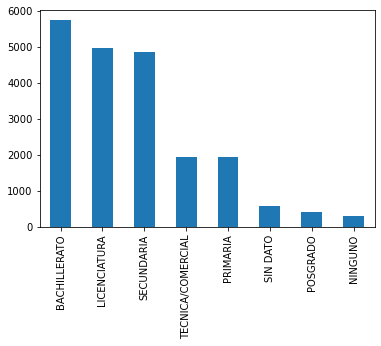

In [19]:
#Para mayor claridad desplegamos una gráfica con la información de la solicitud de seguro
# de desempleo por nivel de estudios
data_df['ult_grado_estudios'].value_counts().plot(kind='bar')

Determinamos el número de solicitantes que han  concluido o tienen trunco su nivel de estudio.

In [20]:
data_df['estatus_estudios'].value_counts()


CONCLUIDO    13645
TRUNCO        6179
SIN DATO       964
Name: estatus_estudios, dtype: int64

<AxesSubplot:>

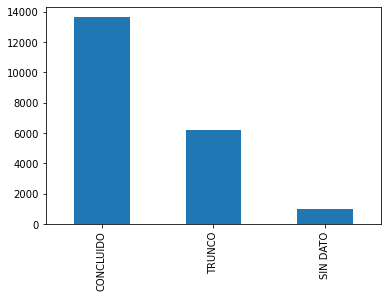

In [21]:
data_df['estatus_estudios'].value_counts().plot(kind='bar')

In [26]:
#Comenzamos a agrupar por la variable último grado de estudios
#para conocer el estatus de estudios, y el estatus de la solicitud 
df = pd.DataFrame(data_df, columns = ['ult_grado_estudios', 'estatus_estudios','estatus']) 

<AxesSubplot:xlabel='ult_grado_estudios,estatus_estudios,estatus'>

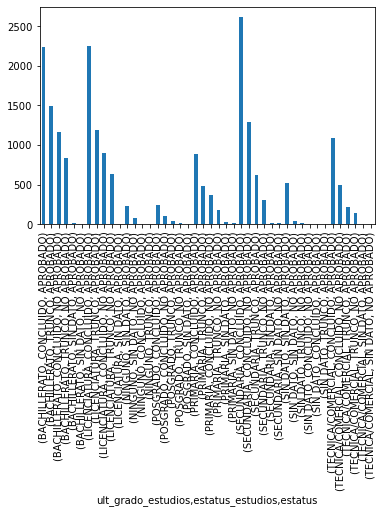

In [27]:
df.groupby(by='ult_grado_estudios').value_counts().plot(kind='bar')

In [28]:
df.groupby(by='ult_grado_estudios').value_counts()

ult_grado_estudios  estatus_estudios  estatus    
BACHILLERATO        CONCLUIDO         APROBADO       2237
                    TRUNCO            APROBADO       1494
                    CONCLUIDO         NO APROBADO    1162
                    TRUNCO            NO APROBADO     841
                    SIN DATO          APROBADO         12
                                      NO APROBADO       3
LICENCIATURA        CONCLUIDO         APROBADO       2251
                    TRUNCO            APROBADO       1192
                    CONCLUIDO         NO APROBADO     901
                    TRUNCO            NO APROBADO     629
                    SIN DATO          APROBADO          5
NINGUNO             SIN DATO          APROBADO        232
                                      NO APROBADO      77
                    CONCLUIDO         APROBADO          4
                    TRUNCO            APROBADO          1
POSGRADO            CONCLUIDO         APROBADO        243
                      

In [44]:
#Comenzamos a agrupar por la variable último grado de estudios
#para conocer el estatus de estudios, y el estatus de la solicitud 
df = pd.DataFrame(data_df, columns = ['ult_grado_estudios', 'estatus']) 
df.groupby(by='ult_grado_estudios').value_counts()

ult_grado_estudios  estatus    
BACHILLERATO        APROBADO       3743
                    NO APROBADO    2006
LICENCIATURA        APROBADO       3448
                    NO APROBADO    1530
NINGUNO             APROBADO        237
                    NO APROBADO      77
POSGRADO            APROBADO        289
                    NO APROBADO     122
PRIMARIA            APROBADO       1387
                    NO APROBADO     549
SECUNDARIA          APROBADO       3261
                    NO APROBADO    1610
SIN DATO            APROBADO        527
                    NO APROBADO      59
TECNICA/COMERCIAL   APROBADO       1304
                    NO APROBADO     639
dtype: int64

<AxesSubplot:xlabel='ult_grado_estudios,estatus'>

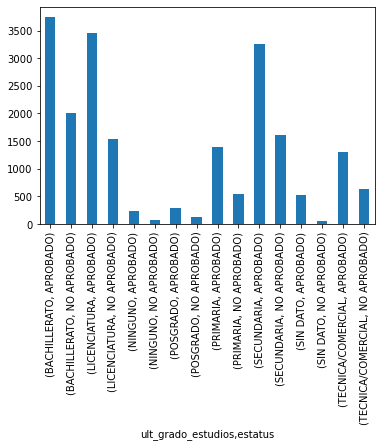

In [46]:
df.groupby(by='ult_grado_estudios').value_counts().plot(kind='bar')

Por la falta de información en otras variables, me enfoque en el ult_grado_estudios, estatus_estudios y estatus para hacer el análisis, ya que las variables estado_civil, dependientes_ecconomicos, um_dependientes_economicos', profesion y tiempo_buscando_empleo las descarté por que los datos en su mayoría no eran proporcionados.

Las personas con los niveles de estudio de bachillerato y licenciatura solicitan la mayor parte  de los seguros de deempleo mientras que los que tienen nivel de posgrado son los que menos lo solicitan.

 Del universo de seguros de desempleos que contiene el archivo que son registros del 24/07/2020 hasta Enero 2021

In [65]:
df = pd.DataFrame(data_df, columns = ['ult_grado_estudios']) 
sum(df.groupby(by='ult_grado_estudios').value_counts())

20788

La mayoria lo representan las personas que tienen nivel de estudios de Bachillerato con un porcentaje sobre el total del porcentaje

In [66]:
(sum(df[df['ult_grado_estudios'] == 'BACHILLERATO'].value_counts())/sum(df.groupby(by='ult_grado_estudios').value_counts()))*100


27.655378102751587

Seguido por quien tiene Licenciatura con un porcentaje sobre el total del porcentaje

In [67]:
(sum(df[df['ult_grado_estudios'] == 'LICENCIATURA'].value_counts())/sum(df.groupby(by='ult_grado_estudios').value_counts()))*100


23.946507600538773

Mientras los que tienen posgrado solo representan un porcentaje mínimo del

In [68]:
(sum(df[df['ult_grado_estudios'] == 'POSGRADO'].value_counts())/sum(df.groupby(by='ult_grado_estudios').value_counts()))*100


1.9771021743313448